## Import Libraries for data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

C:\Users\94777\AppData\Local\Temp\ipykernel_15876\2625918399.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load data from csv
data = pd.read_csv(r'Data/Extracted_MFCCs.csv')
data.head()

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,aggressiveness
0,-581.18304,61.775310,0.334518,8.486256,0.788418,11.279878,-6.216891,0.534891,2.526564,-0.257104,-0.805913,-0.914089,-2.371790,1
1,-574.66840,56.525585,-2.960935,8.754062,1.412463,7.794606,-5.879593,-1.438899,0.365388,-1.025561,-1.278394,-1.151001,-9.105648,1
2,-628.37790,69.173580,-5.179301,4.144491,-2.561467,12.802252,-1.245774,0.469771,1.913076,-0.159788,-1.885625,-7.068508,-4.552937,1
3,-577.23940,67.032510,5.281436,11.227827,3.101099,18.982237,-5.887117,1.355586,6.083599,1.585905,2.887235,3.166880,-1.952211,1
4,-540.83923,89.908420,8.104260,13.206378,1.857440,19.507902,-5.437987,3.933926,7.808056,0.806630,1.848405,-6.200817,-10.122912,1


In [3]:
# Devide to indipendant and dependant variables
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [4]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=1)

In [5]:
x_train

array([[-3.86288330e+02,  1.78686600e+01, -8.95924400e+00, ...,
        -4.53296470e+00, -2.78415420e+00, -1.84543230e+00],
       [-2.73636440e+02,  1.09215126e+02,  2.00975670e+01, ...,
         1.68058380e+00, -4.26139160e+00, -9.31498300e+00],
       [-3.93713470e+02,  1.15033410e+02,  4.30949000e+01, ...,
        -3.96016570e+00,  4.43980540e-01, -6.74464460e+00],
       ...,
       [-6.99450870e+02,  6.34262280e+01,  6.24236050e-01, ...,
        -4.58289500e+00, -5.94408300e+00, -2.39460830e+00],
       [-2.91215500e+02,  1.11394250e+02,  4.00582650e+00, ...,
        -4.94257800e+00, -5.96304750e+00, -8.56218400e+00],
       [-3.67459000e+02,  2.90029000e+01,  3.38085460e+00, ...,
        -2.00941370e+01,  3.37024970e+00, -3.72244670e+00]])

In [6]:
# Get the data count of unique labels
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))


{0: 1413, 1: 1389}

In [7]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2802, 13), (935, 13), (2802,), (935,))

In [8]:
# Scale data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [39]:
import pickle
# Save the scaler
with open('Models//scaler_3.pickle', 'wb') as f:
    pickle.dump(sc, f)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2802, 13), (935, 13), (2802,), (935,))

In [11]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2802, 13, 1), (935, 13, 1), (2802,), (935,))

## Modeling

#### Import Libraries for Model

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv1D,MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [14]:
intializer = tf.keras.initializers.glorot_normal(seed=None)

In [15]:
model = Sequential()
model.add(Conv1D(128, 5,padding='same',
                input_shape=(13,1),kernel_initializer=intializer))
model.add(Activation('relu'))

model.add(Conv1D(512, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(512, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(128, 5,padding='same',kernel_initializer=intializer))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv1D(512, 5,padding='same',kernel_initializer=intializer))
model.add(Flatten())

model.add(Dense(1))
model.add(Activation('sigmoid'))

d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 128)           768       
                                                                 
 activation (Activation)     (None, 13, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 512)           328192    
                                                                 
 activation_1 (Activation)   (None, 13, 512)           0         
                                                                 
 dropout (Dropout)           (None, 13, 512)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 128)           327808    
                                                                 
 activation_2 (Activation)   (None, 13, 128)           0

In [17]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'],
              optimizer=Adam(learning_rate=0.00005))

In [18]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/100


22/22 [==============================] - 3s 79ms/step - loss: 0.6849 - accuracy: 0.5421 - val_loss: 0.6676 - val_accuracy: 0.7519
Epoch 2/100
22/22 [==============================] - 2s 70ms/step - loss: 0.6249 - accuracy: 0.7438 - val_loss: 0.5373 - val_accuracy: 0.8171
Epoch 3/100
22/22 [==============================] - 2s 72ms/step - loss: 0.4803 - accuracy: 0.8044 - val_loss: 0.4046 - val_accuracy: 0.8342
Epoch 4/100
22/22 [==============================] - 2s 72ms/step - loss: 0.4071 - accuracy: 0.8298 - val_loss: 0.3636 - val_accuracy: 0.8578
Epoch 5/100
22/22 [==============================] - 2s 73ms/step - loss: 0.3780 - accuracy: 0.8437 - val_loss: 0.3332 - val_accuracy: 0.8663
Epoch 6/100
22/22 [==============================] - 2s 74ms/step - loss: 0.3557 - accuracy: 0.8512 - val_loss: 0.3141 - val_accuracy: 0.8717
Epoch 7/100
22/22 [==============================] - 2s 74ms/step - loss: 0.3365 - accuracy: 0.8647 - val_loss: 0.3177 - val_accuracy: 0.8663
Epoc

In [19]:
def show_graphs(history):
    epochs = [i for i in range(100)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

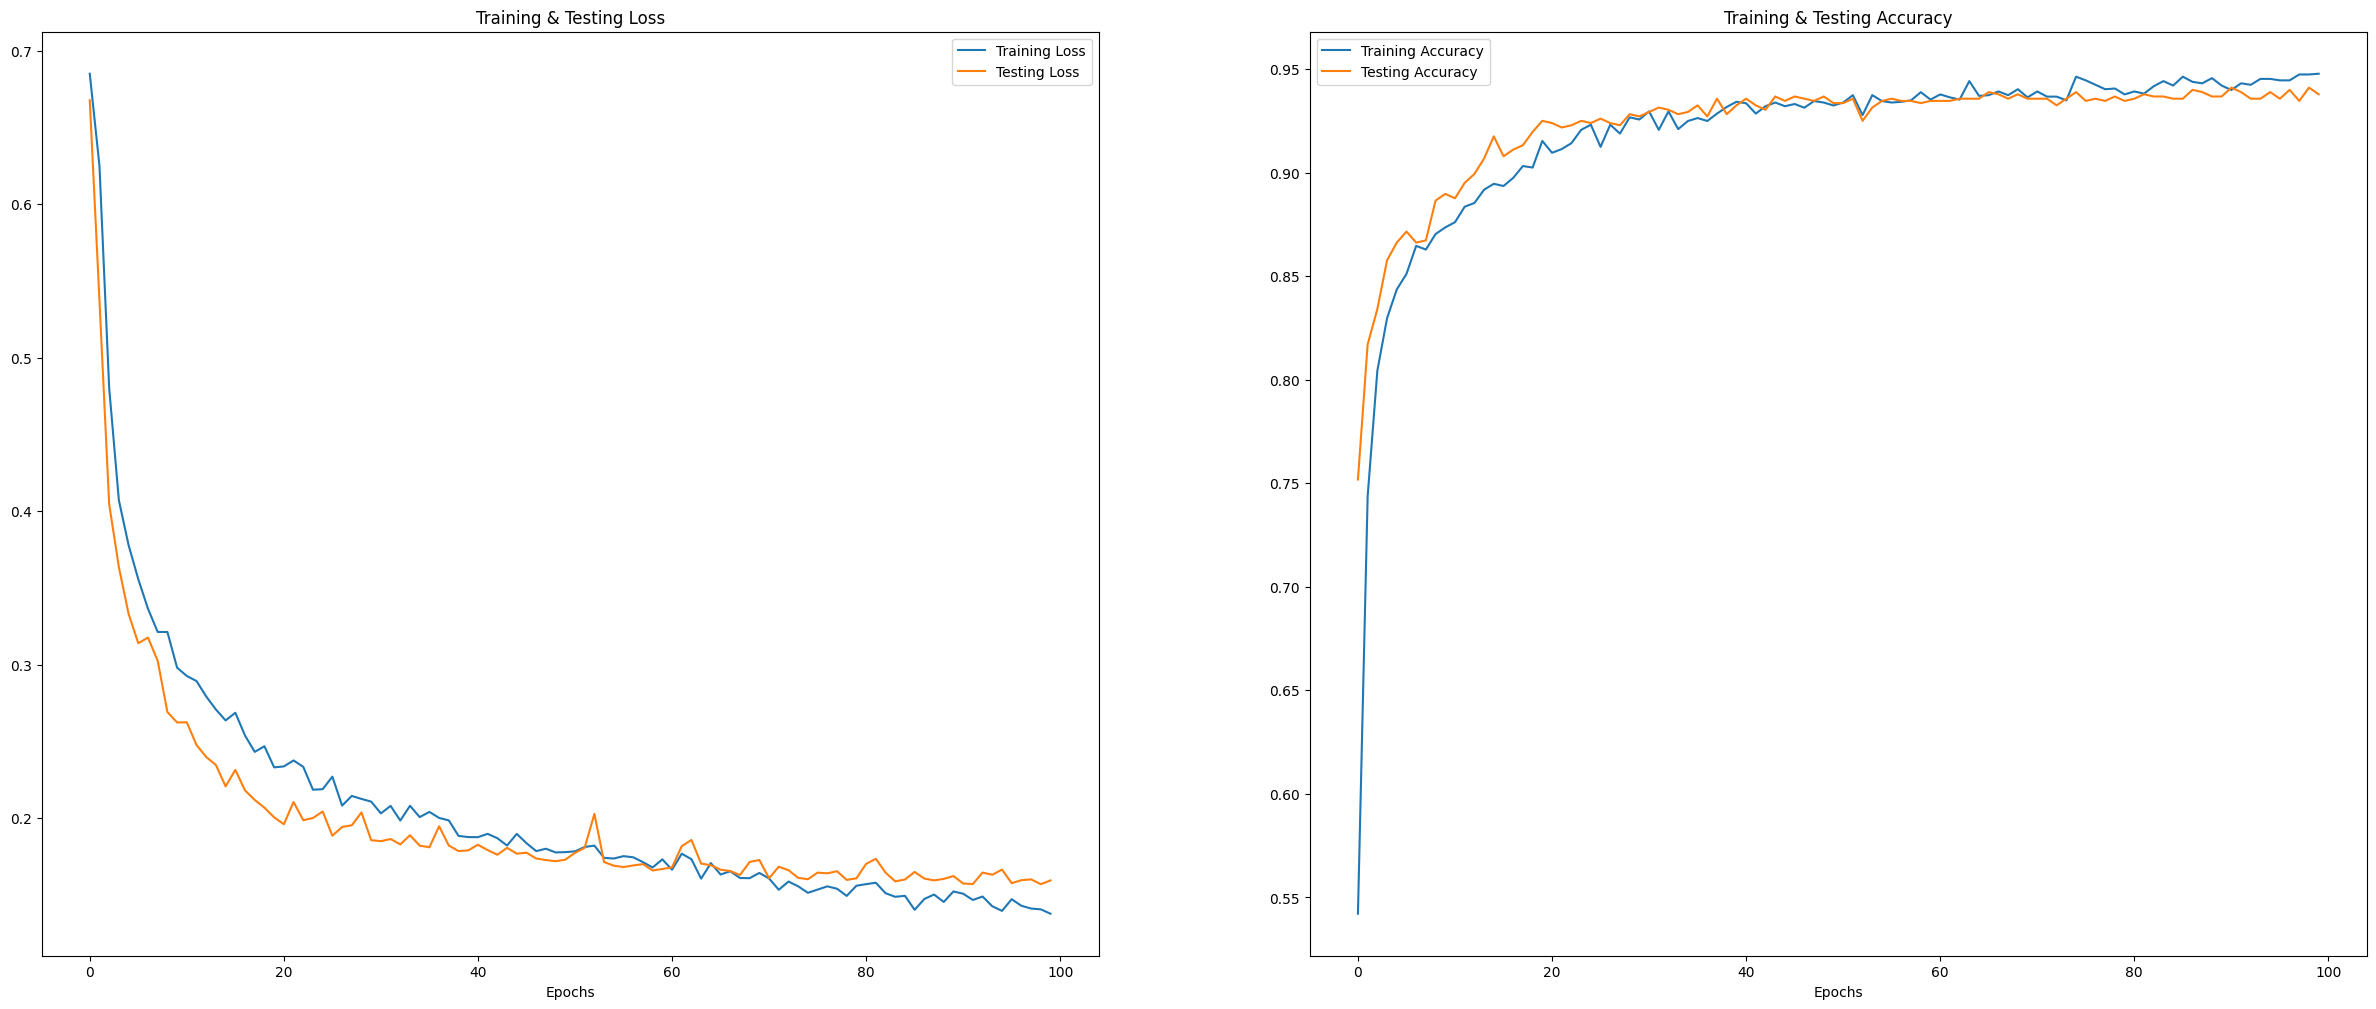

In [20]:
show_graphs(model.history)

### Conlusion

This model is good. Because the Validation accuracy is less than the training accuracy. That means the model doesn't overfit.

In [21]:
y_pred = model.predict(x_test)

30/30 [==============================] - 0s 7ms/step


In [22]:
y_pred = np.array([1 if y>=0.9 else 0 for y in y_pred]) #Threshold

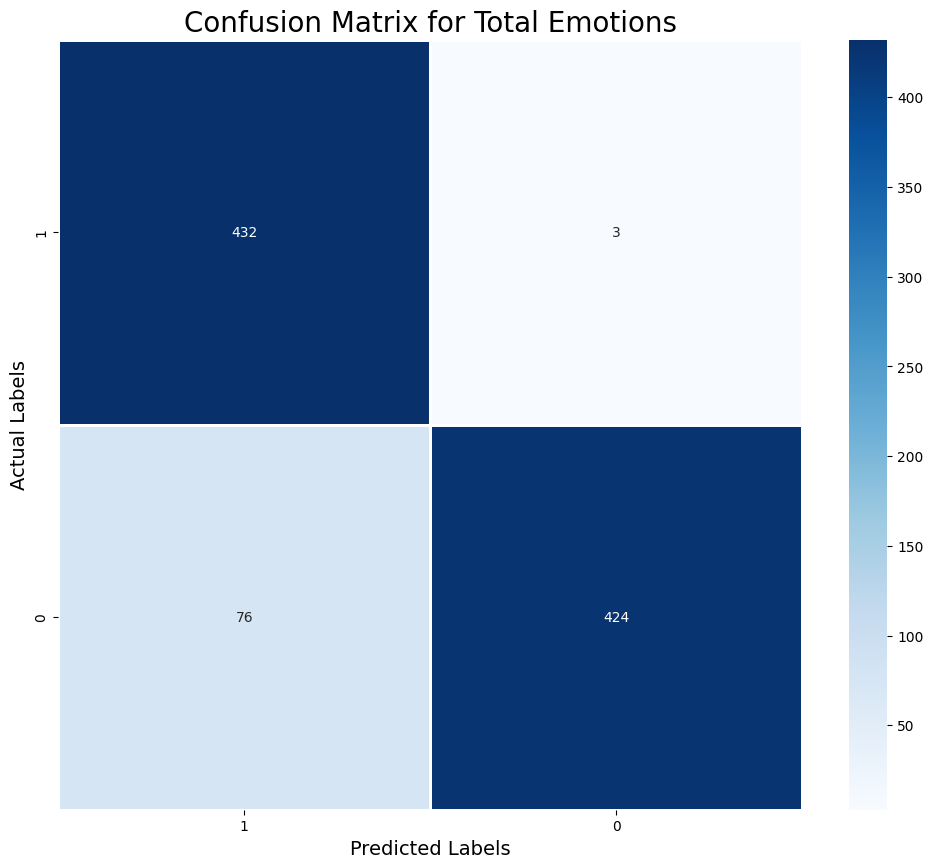

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [1,0] , columns = [1,0])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Total Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [24]:
accuracy_score(y_test, y_pred)

0.9155080213903743

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       435
           1       0.99      0.85      0.91       500

    accuracy                           0.92       935
   macro avg       0.92      0.92      0.92       935
weighted avg       0.93      0.92      0.92       935



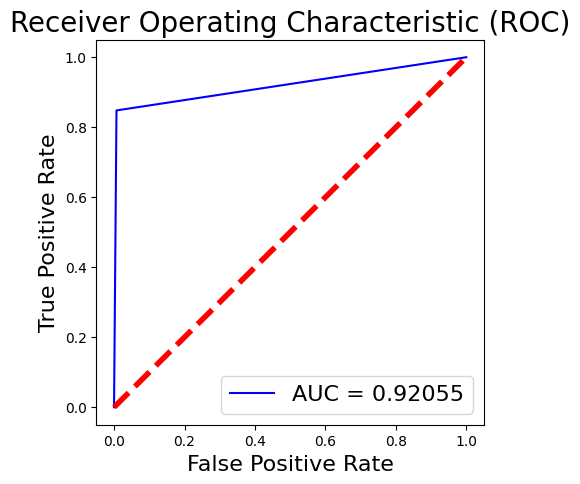

In [26]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic (ROC)', size=20)
plt.plot(fpr, tpr, color='blue', label='AUC = %0.5f' % roc_auc)
plt.legend(loc='lower right', prop={'size': 16})
plt.plot([0, 1], [0, 1], linestyle='--', color='red', linewidth=4, label='Random Chance')
plt.axis('tight')
plt.ylabel('True Positive Rate', size=16)
plt.xlabel('False Positive Rate', size=16)
plt.show()

### Testing

In [28]:
import librosa

In [29]:
def extract_mfcc(signal, sample_rate=22050, n_mfcc=13, n_fft=2048, hop_length=512):
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return np.mean(mfccs.T, axis=0)

In [30]:
# import noisereduce as nr
# import librosa
# import soundfile as sf

# def apply_noise_reduction(input_path, output_path):
#     # Load the audio file
#     audio, sr = librosa.load(input_path, sr=22050)

#     # Perform noise reduction
#     reduced_audio = nr.reduce_noise(audio, sr=22050)

#     # Save the denoised audio
#     sf.write(output_path, reduced_audio,22050)

# # Example usage
# input_path = r"Test Audio\aggressive.mp3"
# output_path = 'denoised__agg_audio.wav'
# apply_noise_reduction(input_path, output_path)


In [31]:
signal, sample_rate = librosa.load("denoised__non_agg_audio.wav", sr=22050)

In [32]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [33]:
model.predict(features)

1/1 [==============================] - 0s 35ms/step


array([[0.04526616]], dtype=float32)

In [34]:
signal, sample_rate = librosa.load("denoised__agg_audio.wav", sr=22050)

In [35]:
features = extract_mfcc(signal)
# Scale data
features = sc.transform(features.reshape(1,-1))
features = np.expand_dims(features, axis=2)

In [36]:
model.predict(features)

1/1 [==============================] - 0s 26ms/step


array([[0.99287784]], dtype=float32)

In [38]:
# Save model
model.save('Models/cnn_model_3.h5')

d:\DSGP\Main\AggroDetect_DSGP\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
